In [15]:
# Larger CNN for the MNIST Dataset
import numpy as np
import cv2
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt

In [16]:
# Fix random seed for reproducibility
seed = 7
np.random.seed(seed)

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape to be samples*pixels*width*height
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# Normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# One Hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [11]:
# Create model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        4624      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
               metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test),
               epochs=10, batch_size=200)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 2s 5ms/step - loss: 0.3751 - accuracy: 0.8838 - val_loss: 0.0796 - val_accuracy: 0.9762
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0953 - accuracy: 0.9708 - val_loss: 0.0507 - val_accuracy: 0.9836
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0706 - accuracy: 0.9783 - val_loss: 0.0467 - val_accuracy: 0.9860
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0563 - accuracy: 0.9829 - val_loss: 0.0401 - val_accuracy: 0.9872
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0476 - accuracy: 0.9852 - val_loss: 0.0323 - val_accuracy: 0.9894
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0417 - accuracy: 0.9864 - val_loss: 0.0266 - val_accuracy: 0.9912
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0366 - accuracy: 0.9881 - val_loss: 0.0274 - val_accuracy: 0.9915
Epoch 

Test images shape: (4, 28, 28)
Predicted digit: 2
Predicted digit: 1
Predicted digit: 0
Predicted digit: 4


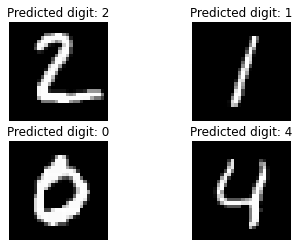

In [18]:
test_images = X_test[1:5]
test_images = test_images.reshape(test_images.shape[0], 28, 28)
print ("Test images shape: {}".format(test_images.shape))
for i, test_image in enumerate(test_images, start=1):
    org_image = test_image
    test_image = test_image.reshape(1,28,28,1)
    prediction = np.argmax(model.predict(test_image), axis=-1)
    print ("Predicted digit: {}".format(prediction[0]))
    plt.subplot(220+i)
    plt.axis('off')
    plt.title("Predicted digit: {}".format(prediction[0]))
    plt.imshow(org_image, cmap=plt.get_cmap('gray'))
plt.show()

In [19]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
